In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 138MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 88s 125ms/step - loss: 1.4012 - accuracy: 0.5533 - val_loss: 0.6606 - val_accuracy: 0.5712
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6529 - accuracy: 0.6115 - val_loss: 0.6634 - val_accuracy: 0.6476
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5637 - accuracy: 0.6906 - val_loss: 0.5597 - val_accuracy: 0.6468
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4956 - accuracy: 0.7380 - val_loss: 0.4805 - val_accuracy: 0.7464
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4420 - accuracy: 0.7757 - val_loss: 0.5399 - val_accuracy: 0.7296
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4093 - accuracy: 0.7967 - val_loss: 0.5416 - val_accuracy: 0.7652
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3571 - accuracy: 0.8244 - val_loss: 0.5365 - val_ac

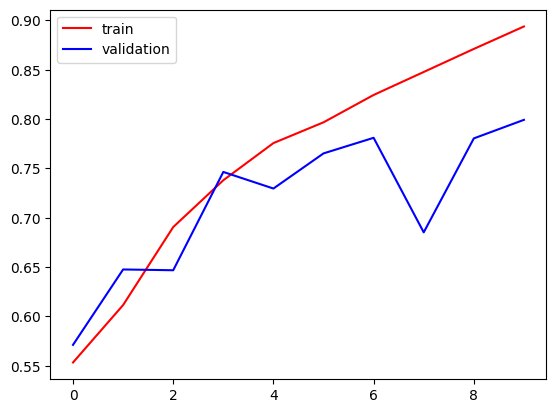

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

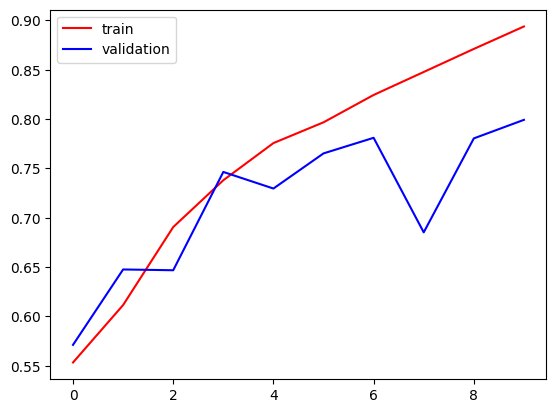

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

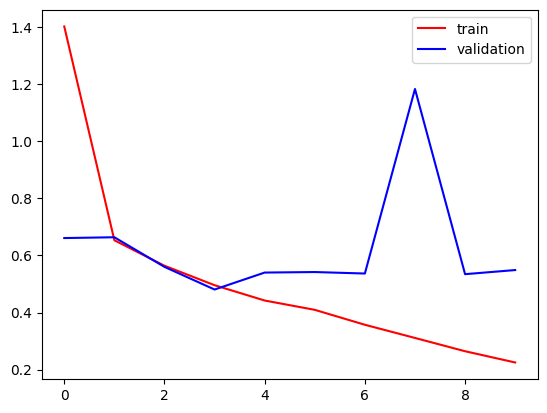

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

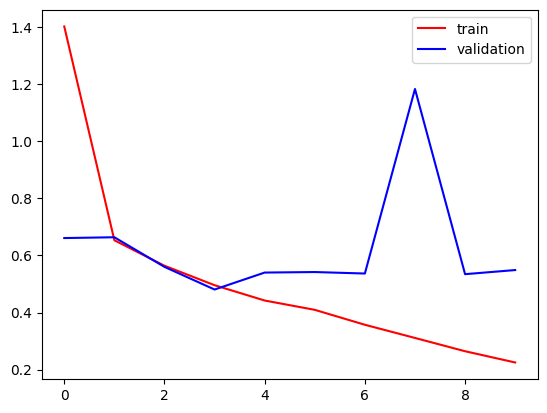

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
print("Image Prediction")

Image Prediction


In [ ]:
test_img = cv2.imread('billu.jpg')

KeyboardInterrupt: 

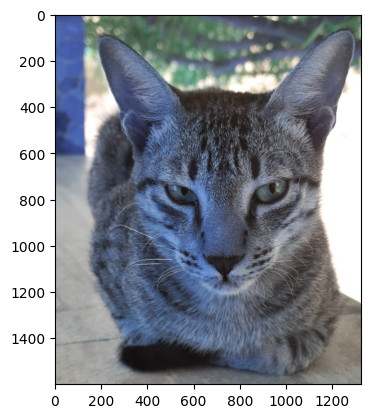

In [ ]:


#import cv2, numpy and matplotlib libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("billu.jpg")
#Displaying image using plt.imshow() method
plt.imshow(img)

#hold the window
plt.waitforbuttonpress()
plt.close('all')

In [ ]:
test_img.shape

(1728, 3072, 3)

In [ ]:
test_img = cv2.resize(img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 2s 2s/step


array([[0.]], dtype=float32)

KeyboardInterrupt: 

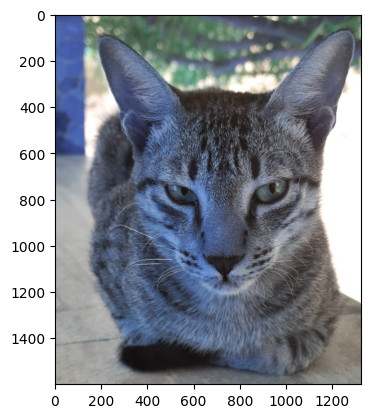

In [ ]:


#import cv2, numpy and matplotlib libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread(".jpg")
#Displaying image using plt.imshow() method
plt.imshow(img)

#hold the window
plt.waitforbuttonpress()
plt.close('all')
test_img = cv2.resize(img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

In [ ]:


#import cv2, numpy and matplotlib libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("tommy.jpg")
#Displaying image using plt.imshow() method
plt.imshow(img)

#hold the window
plt.waitforbuttonpress()
plt.close('all')
test_img = cv2.resize(img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)